[View in Colaboratory](https://colab.research.google.com/github/tarekmuallim/Anomaly-Detection-using-Variational-Autoencoders/blob/master/Anomaly_Detection_using_VAE.ipynb)

# Anomaly Detection
Anomaly detection is an unsupervised pattern recognition task that can be defined under different statistical models.
Given a set of training samples containing no anomalies, the goal of anomaly detection is to design or learn a feature representation, that captures “normal” appearance patterns.

***Here we are using a generative models technique called Variational Autoencoders (VAE) to do Anomaly Detection.***

# **Variational Autoencoder (VAE)**
A variational autoencoder (VAE) provides a probabilistic manner for describing an observation in latent space. Thus, rather than building an encoder which outputs a single value to describe each latent state attribute, we'll formulate our encoder to describe a probability distribution for each latent attribute.

In [1]:
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

In [2]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]    
    epsilon = K.random_normal(shape=(batch, dim))  # by default, random_normal has mean=0 and std=1.0
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

0 : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
1 : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
2 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
3 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
4 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
5 : Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7
6 : Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8
7 : Latch:_LA_269353097_BondProcessAveBondForce;_CEID15652.6
8 : Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7
9 : Latch:_LA_269353069_DiePlacementOnStripX;_CEID15652.11
10 : Latch:_LA_269353070_DiePlacementOnStripY;_CEID15652.12
11 : Latch:_LA_269353071_DiePlacementOnStripTheta;_CEID15652.13
12 : Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step)
13 : Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step)
14 : Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step)
15 : DataID


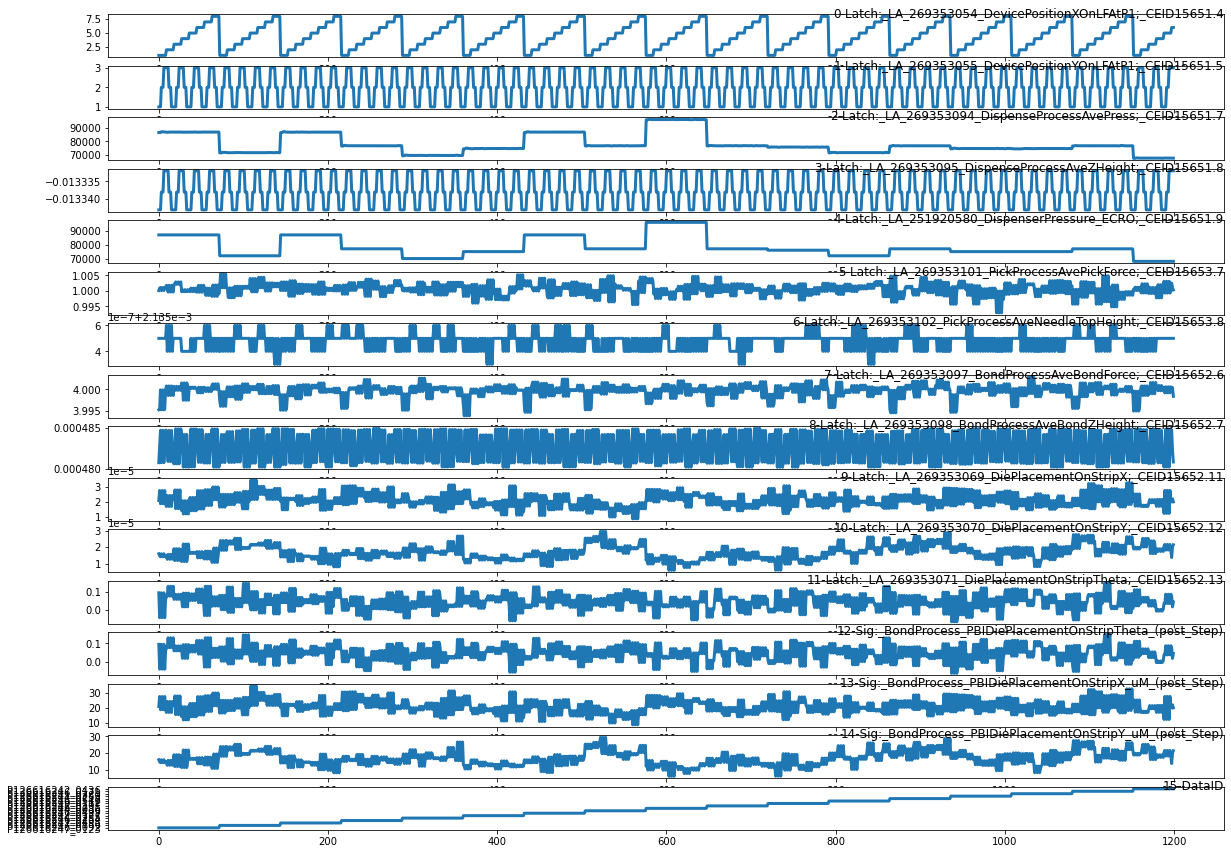

In [3]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU, Input, ConvLSTM2D, Bidirectional,BatchNormalization
from tensorflow.keras import Input
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import math
import json,os
from IPython.core.pylabtools import figsize
FDC_path = r"E:\FDC\dataset"
figsize(10,10) 
#FDC_Data = pd.read_csv(r'E:\FDC\dataset\data2021.csv', sep=',')

import data_vis as dv
import importlib
importlib.reload(dv)




FDC_2021Data = dv.read_data(os.path.join(FDC_path,'data_all_exclude_miss.csv'))
Y_LIST = [1,2,3,4,5,19,20,22,23,26,27,28,35,36,37,44]

X_LIST = dv.find_coi(FDC_2021Data,Y_LIST)
FDC_2021Data = FDC_2021Data.drop(FDC_2021Data.iloc[:,X_LIST],axis=1)
dv.df_col_map(FDC_2021Data)

import data_vis as dv
import importlib
importlib.reload(dv)

dv.draw_trend(FDC_2021Data,groups=range(FDC_2021Data.shape[1]),up=0,down=1200)



In [ ]:
data = np.array(FDC_2021Data.iloc[:,5:12])
targets = np.array(FDC_2021Data.iloc[:,0])
from sklearn.preprocessing import MinMaxScaler,RobustScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

def gen_data(data,window=24):
    
    X_list = []
    y_list = []
    for i in range(0,data.shape[0],24):
        if data[i:i+window,:].shape[0] != 24:
            print("stop")
            print(data[i:i+window,:].shape)
            break
        #print(data[i:i+window,:].shape[0])
        X_list.append(data[i:i+window,:])
        y_list.append([1,2,3,4,5,6,7,8])
        
    
    X_arr = np.array(X_list)
    y_arr = np.array(y_list)
    #X_arr = np.concatenate([X_arr[0]])
    
    return X_arr,y_arr
    
    
X_data,y_data = gen_data(X_scaled)    
    
print(X_data.shape)
print(y_data.shape)

In [4]:
data = np.array(FDC_2021Data.iloc[:,5:12])
targets = np.array(FDC_2021Data.iloc[:,0])
from sklearn.preprocessing import MinMaxScaler,RobustScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

X_data = X_scaled
y_data = targets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(585403, 7)
(195135, 7)
(195135, 7)


In [6]:
# reshape and normalization

original_dim = X_train.shape[1] 
#X_train = np.reshape(X_train, [-1, original_dim])
#X_test = np.reshape(X_test, [-1, original_dim])
#X_val = np.reshape(X_val, [-1, original_dim])
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(585403, 7)
(195135, 7)
(195135, 7)


In [6]:
# network parameters and learning parameters
input_shape = (X_train.shape[1], )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

In [72]:
# encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# sampling 
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var]) 

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 512)          4096        encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_12[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_12[0][0]                   
____________________________________________________________________________________________

In [35]:
# plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

In [73]:
# decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(7, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 3591      
Total params: 5,127
Trainable params: 5,127
Non-trainable params: 0
_________________________________________________________________


In [54]:
# plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

In [74]:
# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 7)]               0         
_________________________________________________________________
encoder (Functional)         [(None, 2), (None, 2), (N 6148      
_________________________________________________________________
decoder (Functional)         (None, 7)                 5127      
Total params: 11,275
Trainable params: 11,275
Non-trainable params: 0
_________________________________________________________________


In [75]:
# VAE loss
# reconstruction_loss = mse(inputs, outputs)
reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
# vae_loss = K.mean(reconstruction_loss)

In [76]:
# vae.compile(optimizer='adam', loss=vae_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 7)]          0                                            
__________________________________________________________________________________________________
encoder (Functional)            [(None, 2), (None, 2 6148        encoder_input[0][0]              
__________________________________________________________________________________________________
decoder (Functional)            (None, 7)            5127        encoder[0][2]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 512)          4096        encoder_input[0][0]              
________________________________________________________________________________________________

In [77]:
# Learning
# epochs = 50
history = vae.fit(X_train, epochs=10, batch_size=batch_size, validation_data=(X_val, None))

Epoch 1/10
4574/4574 [==============================] - 24s 5ms/step - loss: 3.1382 - val_loss: 3.1237
Epoch 2/10
4574/4574 [==============================] - 23s 5ms/step - loss: 3.1254 - val_loss: 3.1234
Epoch 3/10
4574/4574 [==============================] - 22s 5ms/step - loss: 3.1250 - val_loss: 3.1227
Epoch 4/10
4574/4574 [==============================] - 23s 5ms/step - loss: 3.1248 - val_loss: 3.1229
Epoch 5/10
4574/4574 [==============================] - 22s 5ms/step - loss: 3.1246 - val_loss: 3.1224
Epoch 6/10
4574/4574 [==============================] - 23s 5ms/step - loss: 3.1245 - val_loss: 3.1225
Epoch 7/10
4574/4574 [==============================] - 22s 5ms/step - loss: 3.1245 - val_loss: 3.1227
Epoch 8/10
4574/4574 [==============================] - 22s 5ms/step - loss: 3.1245 - val_loss: 3.1225
Epoch 9/10
4574/4574 [==============================] - 22s 5ms/step - loss: 3.1245 - val_loss: 3.1224
Epoch 10/10
4574/4574 [==============================] - 22s 5ms/step - l

In [61]:
vae.save_weights('vae_mnist.h5')

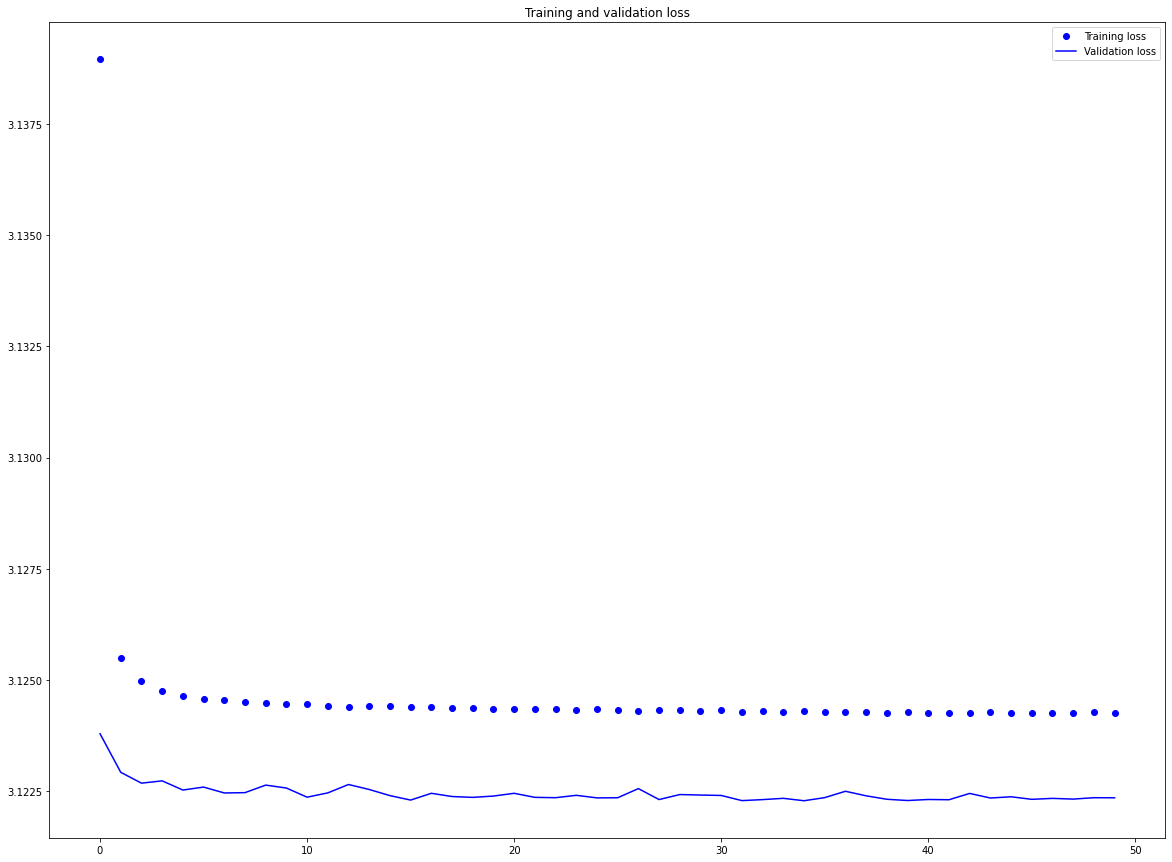

In [62]:
# plot loss history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

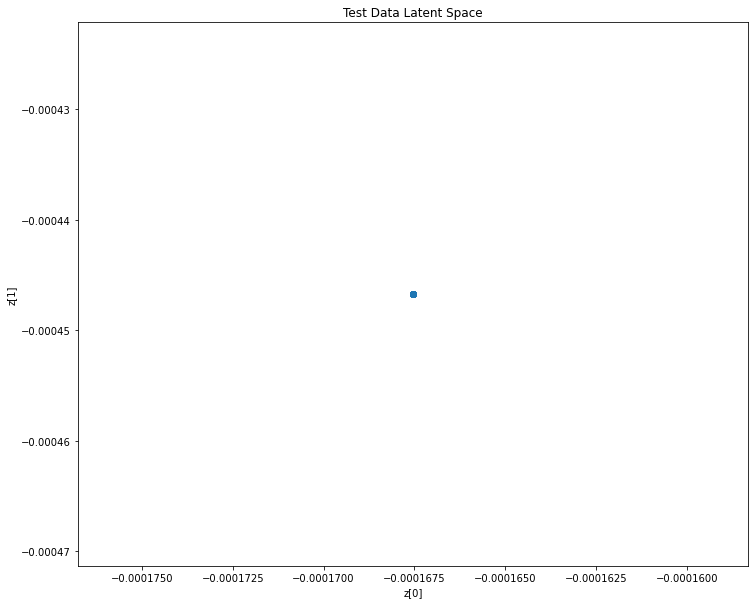

In [63]:
# Visualization of latent space
z_mean, _, _ = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1])
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title('Test Data Latent Space')
plt.show()

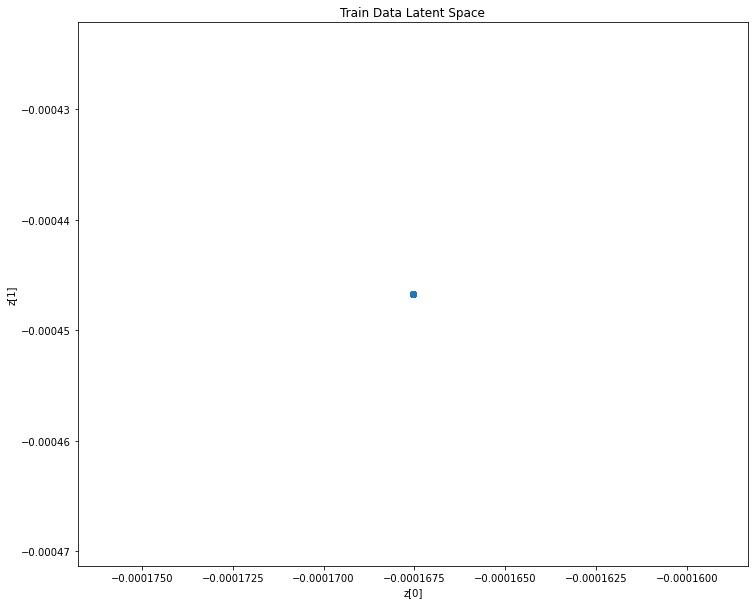

In [64]:
# Visualization of latent space
z_mean, _, _ = encoder.predict(X_train, batch_size=batch_size)
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1])

plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title('Train Data Latent Space')
plt.show()

# Visualization of Latent Space
When we supply the whole data to the trained VAE, we can see that result is separable
the anomaly digits (digits which is not "one") are outside the distribution of normal latent space.

In [ ]:
y_test.shape

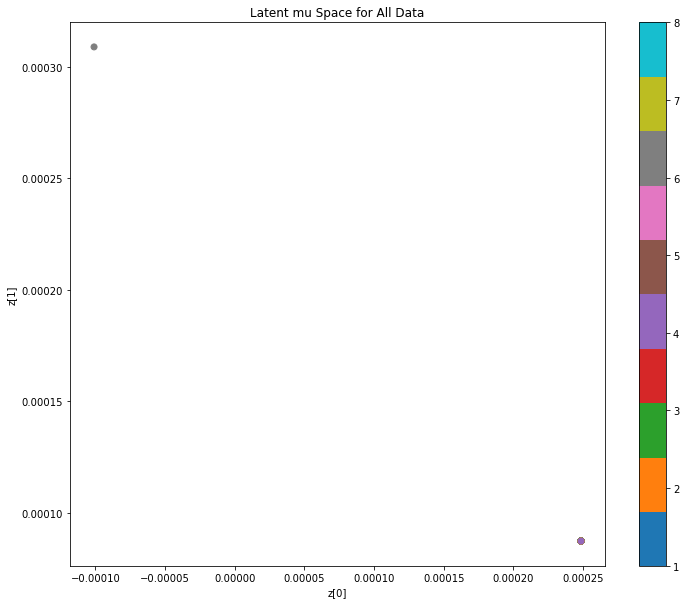

In [78]:
# Visualization of latent space
z_mean,z_log_var, _ = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1],c=y_test)
plt.colorbar()
plt.set_cmap('tab10')
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title('Latent mu Space for All Data')
plt.show()

In [ ]:
# Visualization of latent space
plt.figure(figsize=(12, 10))
plt.scatter(z_log_var[:, 0], z_log_var[:, 1], c=y_test)
plt.colorbar()
plt.set_cmap('tab10')
plt.xlabel("z_log_var[0]")
plt.ylabel("z_log_var[1]")
plt.title('Latent log_var Space for All Data')
plt.show()

In [ ]:
# test reconstruction for one digit

i = 14

digit_size = 28


digit = x_train[i].reshape(digit_size, digit_size)

figure = digit
plt.figure(figsize=(5, 5))
plt.imshow(figure, cmap='gray')
plt.show()



z_sample = np.array(z_mean)
x_decoded = decoder.predict(z_sample)
digit = x_decoded[i].reshape(digit_size, digit_size)


figure = digit
plt.figure(figsize=(5, 5))
plt.imshow(figure, cmap='gray')
plt.show()



In [ ]:
# test reconstruction
    n = 20
    digit_size = 28
    figure = np.zeros((digit_size * 2, digit_size * n))
    grid_x = np.linspace(0, n, n)


    for j, xi in enumerate(grid_x):
        z_sample = np.array(z_mean)
        x_decoded = decoder.predict(z_sample)
        digit = x_train[j].reshape(digit_size, digit_size)
        figure[0 * digit_size: (0 + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
        digit = x_decoded[j].reshape(digit_size, digit_size)
        figure[1 * digit_size: (1 + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(n, n))
    
    plt.imshow(figure, cmap='gray')
    plt.show()